<a href="https://colab.research.google.com/github/nickplas/Intro_to_ML_24-25/blob/main/challenges/challenge-one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge 1: The banknote-authentication data set problem

We will perform a nearly realistic analysis of the data set bank note authentication that can be downloaded from https://archive.ics.uci.edu/dataset/267/banknote+authentication

## Data set description

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.
These features are:
1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer)

## Task description
We have a binary classification problem. The assignment can be divided in several parts:
    
    1. Load the data and pretreatment.
    2. Data exploring by Unsupervised Learning techniques.
    3. Construction of several models of Supervised Learning.

In [5]:
# Load libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from seaborn import pairplot
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

from numpy import linalg as LA
from scipy.spatial.distance import cdist
from sklearn.linear_model import LinearRegression
from sklearn.metrics.cluster import normalized_mutual_info_score

In [6]:
import matplotlib.colors as mcolors

my_colors = ("#64F9C7", "#FFB600","#FFFF00", "#ee6055", "#57f054", "#c73596", "#a26769", "#7ca5b8")
my_cmap = mcolors.LinearSegmentedColormap.from_list("my_cmap", my_colors)

### 1. Data pretreatment

Load the data and look at it: It is needed some kind of scaling? Why? Are the data points sorted in the original data set? Can it generate problems? How can this be solved?

In [7]:
my_names = ('variance', 'skewness', 'curtosis', 'entropy', 'class')
data = pd.read_csv("./data_banknote_authentication.txt", names = my_names)
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [8]:
# Transform the data to use it as numpy arrays.
X = data.iloc[:,:-1].values
labels = data.iloc[:,4].values
print(X.shape)
N = X.shape[0]  # Number of data points
num_classes = X.shape[1]  # Number of features/components

(1372, 4)


We can see that different features have different scales, so let's make them more uniform using standardization

In [9]:
# Standardizing the features of the data to handle different units
scaler = preprocessing.StandardScaler().fit(X)

# Transforming the original data using the calculated mean and standard deviation
X_scaled = scaler.transform(X)
X_scaled

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

Let's see how the data is distributed considering pairs of features

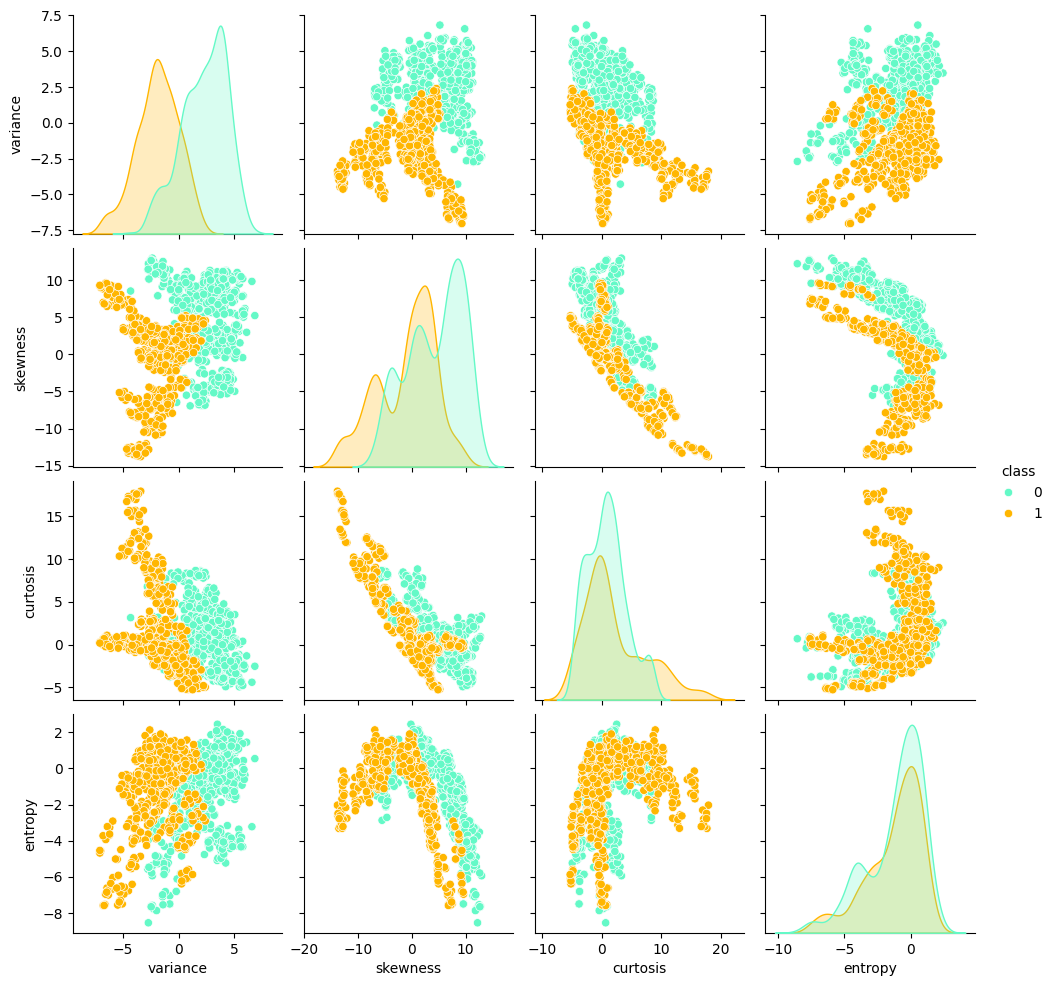

In [10]:
pairplot(data, vars = my_names[0:4], hue = 'class', palette = my_colors)

From the data supplier we know there are no missing values, so there's no need to check for them.

### 2. Unsupervised Learning

Use PCA and plot the two first components colouring according with the class. Are the classes linearly separable in this projection? What happens when I applied k-means with two classes in this space? And if I use all the coordinates? Try also t-SNE for projection and DBSCAN for the clustering and comment on the results.

In [11]:
# Let's start with PCA
pca_2 = PCA(n_components=2)
# Fitting the PCA model to the scaled data
pca_2.fit(X_scaled)
# Transforming the original data to the principal components
projection_2 = pca_2.transform(X_scaled)

# Calculating the cumulative explained variance for each feature
cumulative_variance = np.zeros(num_classes)
for i in range(num_classes):
    cumulative_variance[i] = np.sum(pca_2.explained_variance_ratio_[:i+1])
print(f'Explained variance with two principal components:\n{round(cumulative_variance[-1]*100, 2)}%')

Explained variance with two principal components:
86.83%


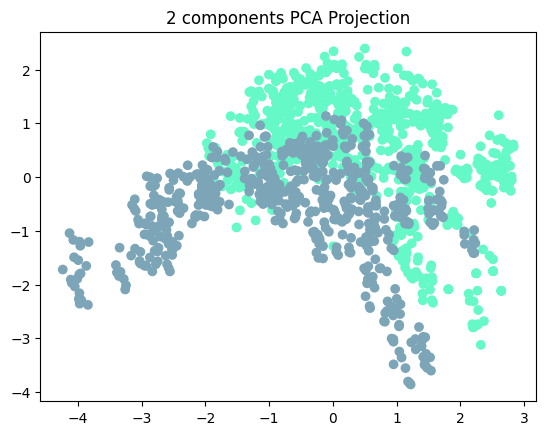

In [12]:
# Scatter plot of PCA-transformed data with 2 components
plt.scatter(projection_2[:, 0], projection_2[:, 1],cmap = my_cmap, c=labels)
plt.title('2 components PCA Projection')
plt.show()

We can see the two classes following a certain pattern, but with only two principal components the data overlaps and it's not possible to separate it.
Let's see if we can improve this by adding another principal component.

In [13]:
pca_3 = PCA(n_components=3)
pca_3.fit(X_scaled)
projection_3 = pca_3.transform(X_scaled)

# Calculating the cumulative explained variance for each feature
cumulative_variance = np.zeros(num_classes)
for i in range(num_classes):
    cumulative_variance[i] = np.sum(pca_3.explained_variance_ratio_[:i+1])
print(f'Explained variance with three principal components:\n{round(cumulative_variance[-1]*100, 2)}%')

Explained variance with three principal components:
95.61%


Text(0.5, 0.92, '3 components PCA Projection')

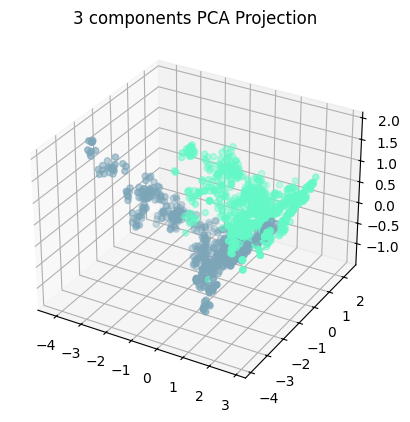

In [14]:
# Scatter plot of PCA-transformed data with 3 components
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(projection_3[:,0], projection_3[:,1], projection_3[:,2], c = labels, cmap = my_cmap)
ax.set_title('3 components PCA Projection')

The two clusters are clearly visible into this representation; PCA with three compoments seems to summarise our data pretty well, with less than 5% of the variance of the original data being lost to the dimensionality reduction, so we can assume there are good linear correlations in our original data

Text(0.5, 1.0, 'K-means 2D clustering')

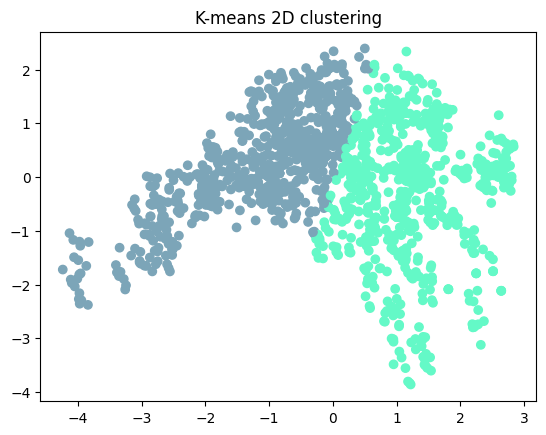

In [15]:
# Let's try using k-means to separate these two clusters, starting with the 2d representation
kmeans_2 = KMeans(n_clusters=2)
kmeans_clust_2 = kmeans_2.fit(projection_2)

# Scatter plot of the clusters found
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(projection_2[:,0], projection_2[:,1], c = kmeans_2.labels_, cmap = my_cmap)
ax.set_title('K-means 2D clustering')

In two dimensions k-means is unable to distinguish the original two clusters, let's try in 3 dimensions

Text(0.5, 0.92, 'K-means 3D clustering')

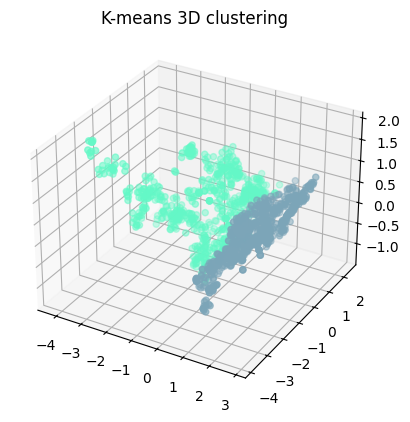

In [16]:
kmeans_3 = KMeans(n_clusters=2)
kmeans_clust_3 = kmeans_3.fit(projection_3)

# Scatter plot of the clusters found
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(projection_3[:,0], projection_3[:,1], projection_3[:,2], c = kmeans_3.labels_, cmap = my_cmap)
ax.set_title('K-means 3D clustering')

Even with threee dimensions k-means seems to have a hard time separating the two clusters we're interested in

Now let's use some more advanced methods, starting with t-SNE. We'll try to use different perplexities and see if and how the results vary

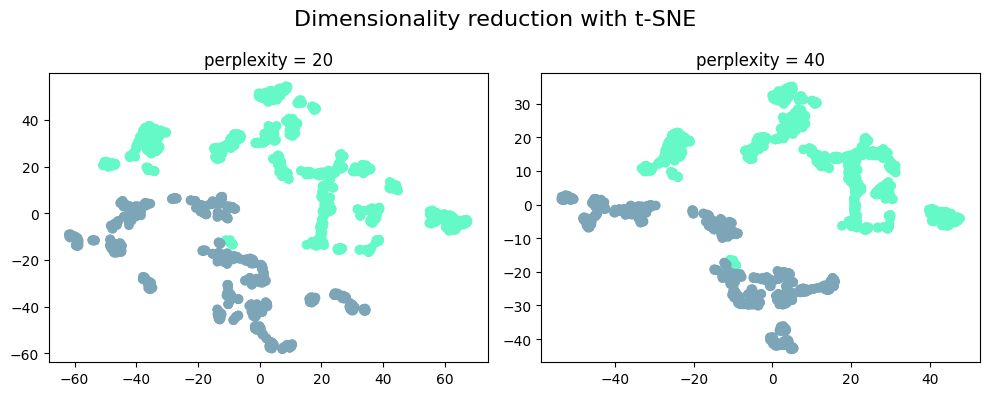

In [17]:
X_emb_1 = TSNE(perplexity = 20).fit_transform(X)
X_emb_2 = TSNE(perplexity = 40).fit_transform(X)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(X_emb_1[:, 0], X_emb_1[:, 1], c=labels, cmap=my_cmap)
axs[0].set_title('perplexity = 20')

axs[1].scatter(X_emb_2[:, 0], X_emb_2[:, 1], c=labels, cmap=my_cmap)
axs[1].set_title('perplexity = 40')

fig.suptitle('Dimensionality reduction with t-SNE', fontsize=16)

plt.tight_layout()
plt.show()

Let's do the same thing with the standardized values

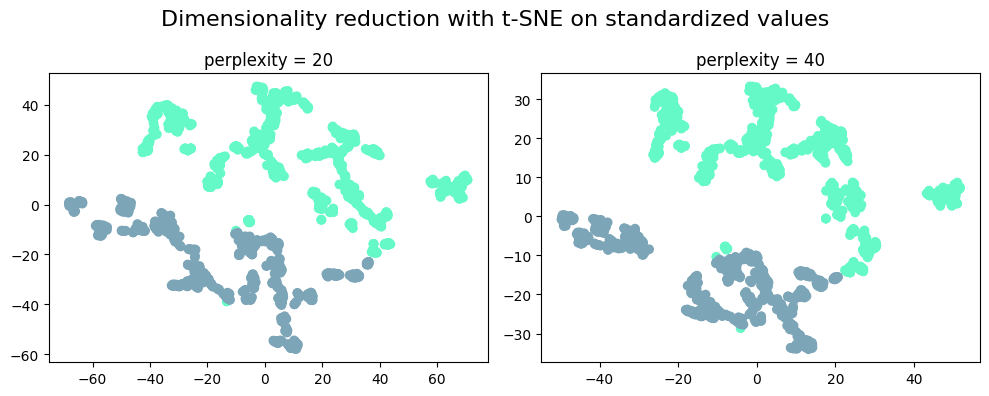

In [18]:
X_emb_1 = TSNE(perplexity = 20).fit_transform(X_scaled)
X_emb_2 = TSNE(perplexity = 40).fit_transform(X_scaled)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(X_emb_1[:, 0], X_emb_1[:, 1], c=labels, cmap=my_cmap)
axs[0].set_title('perplexity = 20')

axs[1].scatter(X_emb_2[:, 0], X_emb_2[:, 1], c=labels, cmap=my_cmap)
axs[1].set_title('perplexity = 40')

fig.suptitle('Dimensionality reduction with t-SNE on standardized values', fontsize=16)

plt.tight_layout()
plt.show()

t-SNE seems to separate roughly well the data in two dimensions, with the exception of some data points which are placed right into the opposite cluster. We can see that the standardized values are more compact in their representation.

Now let's try using DBSCAN to create clusters of our data. This time we're going to only use the standardized data, since DBSCAN works best with scaled data

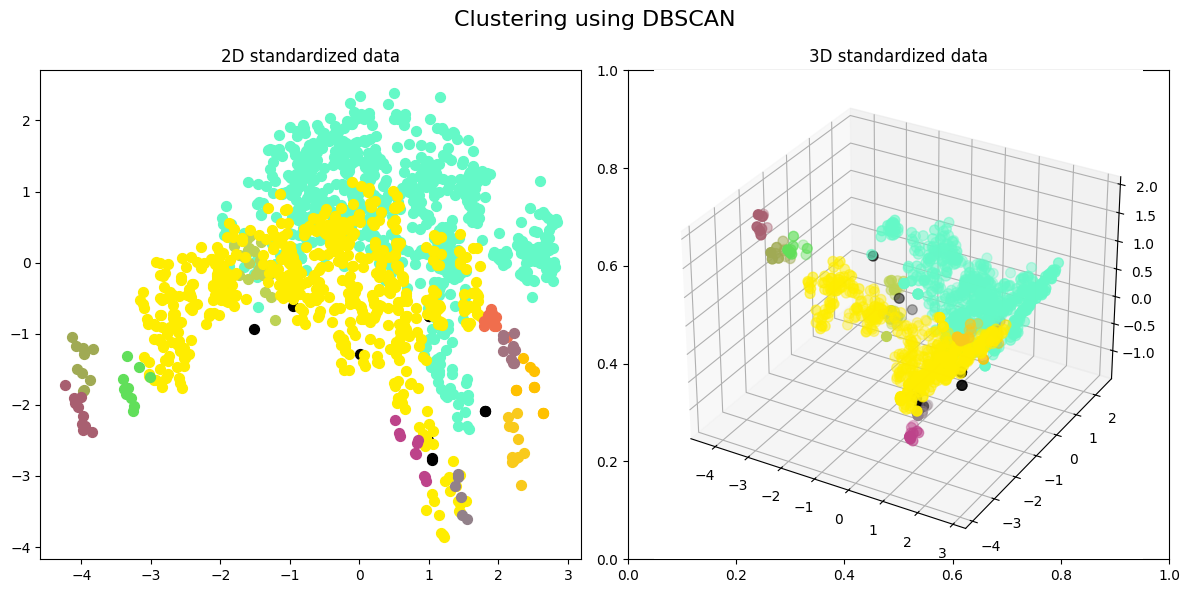

In [19]:
db = DBSCAN(eps = 0.49, min_samples = 7).fit(X_scaled)
db_labels = db.labels_

fig, axs = plt.subplots(1,2, figsize=(12, 6))
# make the second one a 3d plot
axs[1] = fig.add_subplot(1, 2, 2, projection='3d')

clusters = np.unique(db_labels)

# Plot the 2D data
for label in clusters:
    label_mask = db_labels == label
    color = "black" if label == -1 else my_cmap(label / (len(clusters) - 1))
    axs[0].scatter(
        projection_2[label_mask, 0],
        projection_2[label_mask, 1],
        label="Noise" if label == -1 else f"Cluster {label}",
        c=[color],
        s=50,
    )
axs[0].set_title("2D standardized data")

# Plot the 3D data
for label in clusters:
    label_mask = db_labels == label
    color = "black" if label == -1 else my_cmap(label / (len(clusters) - 1))
    axs[1].scatter(
        projection_3[label_mask, 0],
        projection_3[label_mask, 1],
        projection_3[label_mask, 2],
        label="Noise" if label == -1 else f"Cluster {label}",
        c=[color],
        s=50,
    )
axs[1].set_title("3D standardized data")

fig.suptitle('Clustering using DBSCAN', fontsize=16)

plt.tight_layout()
plt.show()

DBSCAN with the right parameters seems to get the main idea underlying the data, assigning some outliers to separate clusters. We can also confirm that this method is much faster than the previous one

### 3. Supervised Learning

Generate a subset of the data of 372 elements that would be saved as test set. With the rest of the data generate the following models: Logistic Regression, Decision tree (use the ID3 algorithm), Naive Bayesian and k-NN. 

Investigate the effect of regularization (when possible) and use cross validation for setting the hyper-parameters when needed. 

Compare the performances in terms of accuracy, precision, recall and F1-score on the test set. Comment these results at the light of those obtained from the Unsupervised Learning analysis. Could you propose a way to improve these results?     


In [ ]:
from sklearn.model_selection import train_test_split

# Decido di usare i dati scalati per tutti i modelli seguenti
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=372/1372, random_state=101)

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def test_performances(y_test, y_pred):
    return accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

In [29]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

log_reg = LogisticRegression(penalty=None).fit(X_train, y_train)
log_reg_l1= LogisticRegression(solver='liblinear',penalty='l1').fit(X_train, y_train)
log_reg_l2 = LogisticRegression(penalty='l2').fit(X_train, y_train)
log_reg_en = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5).fit(X_train, y_train)

y_pred, y_pred_l1, y_pred_l2, y_pred_en = log_reg.predict(X_test), log_reg_l1.predict(X_test), log_reg_l2.predict(X_test), log_reg_en.predict(X_test)

acc, prec, rec, f1 = test_performances(y_test, y_pred)
acc_l1, prec_l1, rec_l1, f1_l1 = test_performances(y_test, y_pred_l1)
acc_l2, prec_l2, rec_l2, f1_l2 = test_performances(y_test, y_pred_l2)
acc_en, prec_en, rec_en, f1_en = test_performances(y_test, y_pred_en)

scores = pd.DataFrame({
    'Model': ['Logistic Regression', 'Logistic Regression L1', 'Logistic Regression L2', 'Logistic Regression Elastic Net'],
    'Accuracy': [acc, acc_l1, acc_l2, acc_en],
    'Precision': [prec, prec_l1, prec_l2, prec_en],
    'Recall': [rec, rec_l1, rec_l2, rec_en],
    'F1 Score': [f1, f1_l1, f1_l2, f1_en]
})

print(scores)

                             Model  Accuracy  Precision  Recall  F1 Score
0              Logistic Regression  0.994624   0.987179     1.0  0.993548
1           Logistic Regression L1  0.994624   0.987179     1.0  0.993548
2           Logistic Regression L2  0.986559   0.968553     1.0  0.984026
3  Logistic Regression Elastic Net  0.986559   0.968553     1.0  0.984026


In [33]:
from sklearn.tree import DecisionTreeClassifier

id3 = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
y_pred = id3.predict(X_test)
acc, prec, rec, f1 = test_performances(y_test, y_pred)

scores = pd.DataFrame({
    'Model' : ['ID3'],
    'Accuracy' : [acc],
    'Precision' : [prec],
    'Recall' : [rec],
    'F1 Score' : [f1]
})

print(scores)

  Model  Accuracy  Precision  Recall  F1 Score
0   ID3  0.991935   0.980892     1.0  0.990354


In [34]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB().fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

acc_nb, prec_nb, rec_nb, f1_nb = test_performances(y_test, y_pred_nb)

scores_nb = pd.DataFrame({
    'Model': ['Naive Bayes'],
    'Accuracy': [acc_nb],
    'Precision': [prec_nb],
    'Recall': [rec_nb],
    'F1 Score': [f1_nb]
})

print(scores_nb)

         Model  Accuracy  Precision    Recall  F1 Score
0  Naive Bayes   0.83871   0.801282  0.811688  0.806452
